In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.signal as signal


In [2]:
# =========LOAD PPO data===============
file_path = 'RL_PPO_35M.csv'  # Replace with your file path
data = pd.read_csv(file_path)

rewards_steps_PPO = data.iloc[:, 1]  # Second column (Step)
rewards_PPO = data.iloc[:, 2]  # Third column (Value)

file_path = 'RL_PPO_35M_valueLoss.csv'  # Replace with your file path
data = pd.read_csv(file_path)

values_steps_PPO = data.iloc[:, 1]  # Second column (Step)
values_PPO = data.iloc[:, 2]  # Third column (Value)

# =========LOAD A2C data===============

file_path = 'A2C_reward2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

rewards_steps_A2C = data.iloc[:, 1]  # Second column (Step)
rewards_A2C = data.iloc[:, 2]  # Third column (Value)

file_path = 'A2CLoss2_2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

values_steps_A2C = data.iloc[:, 1]  # Second column (Step)
values_A2C = data.iloc[:, 2]  # Third column (Value)
# rewards_steps_A2C = rewards_steps_PPO  # Second column (Step)
# rewards_A2C = np.random.randint(min(rewards_PPO), max(rewards_PPO), len(rewards_PPO))  # Third column (Value)
# values_steps_A2C = values_steps_PPO  # Second column (Step)
# values_A2C = np.random.randint(min(values_PPO), max(values_PPO), len(values_PPO))  # Third column (Value)

In [3]:
sampling_rate = 100  # Sampling rate (samples per second)
cutoff_frequency = 1  # Cutoff frequency (in Hz), for example, 1 Hz
nyquist = 0.5 * sampling_rate  # Nyquist frequency
normal_cutoff = cutoff_frequency / nyquist  # Normalize cutoff frequency

# Design the low-pass Butterworth filter
order = 2  # Filter order (higher means steeper rolloff)
b, a = signal.butter(order, normal_cutoff, btype='low')

# Step 3: Apply the low-pass filter to the noisy signal
rewards_PPO_filtered = signal.filtfilt(b, a, rewards_PPO)
rewards_A2C_filtered = signal.filtfilt(b, a, rewards_A2C)
values_PPO_filtered = signal.filtfilt(b, a, values_PPO)
values_A2C_filtered = signal.filtfilt(b, a, values_A2C)

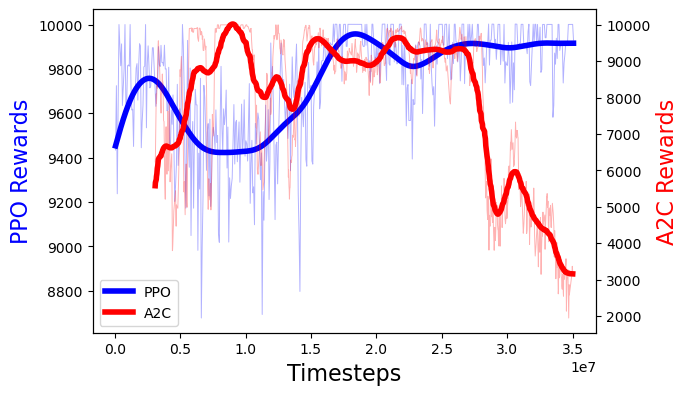

In [6]:
# import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6.5, 4.2))

# Plot for PPO on the primary y-axis
ax1.plot(rewards_steps_PPO, rewards_PPO, linestyle='-', color='b', alpha=0.3, linewidth=0.7)
ax1.plot(rewards_steps_PPO, rewards_PPO_filtered, linestyle='-', color='b', label='PPO', linewidth=4)
ax1.set_xlabel("Timesteps", fontsize=16)
ax1.set_ylabel("PPO Rewards", color='b', fontsize=16)
ax1.tick_params(axis='y', labelcolor='k')

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(rewards_steps_A2C, rewards_A2C, linestyle='-', color='r', alpha=0.3, linewidth=0.7)
ax2.plot(rewards_steps_A2C, rewards_A2C_filtered, linestyle='-', color='r', label='A2C', linewidth=4)
ax2.set_ylabel("A2C Rewards", color='r', fontsize=16)
ax2.tick_params(axis='y', labelcolor='k')

# Add a single legend for both plots
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left')

# Add title and save the plot
# plt.title("Rollout Rewards")
plt.savefig('Rewards.png')
plt.show()


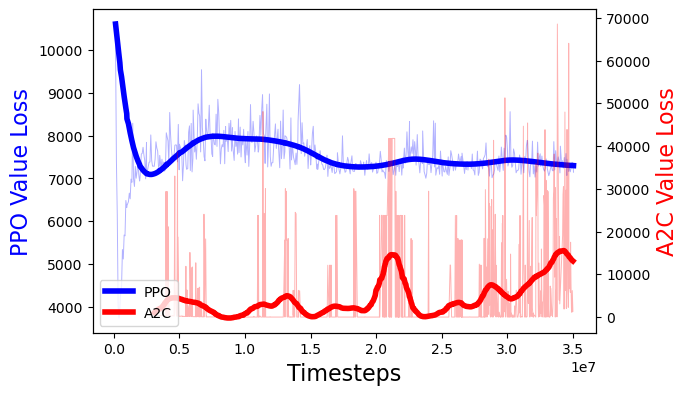

In [7]:
# import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6.5, 4.2))

# Plot for PPO on the primary y-axis
ax1.plot(values_steps_PPO, values_PPO, linestyle='-', color='b', alpha=0.3, linewidth=0.7)
ax1.plot(values_steps_PPO, values_PPO_filtered, linestyle='-', color='b', label='PPO', linewidth=4)
ax1.set_xlabel("Timesteps", fontsize=16)
ax1.set_ylabel("PPO Value Loss", color='b', fontsize=16)
ax1.tick_params(axis='y', labelcolor='k')

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(values_steps_A2C, values_A2C, linestyle='-', color='r', alpha=0.3, linewidth=0.7)
ax2.plot(values_steps_A2C, values_A2C_filtered, linestyle='-', color='r', label='A2C', linewidth=4)
ax2.set_ylabel("A2C Value Loss", color='r', fontsize=16)
ax2.tick_params(axis='y', labelcolor='k')

# Add a single legend for both plots
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left')

# Add title and save the plot
# plt.title("Rollout Rewards")
plt.savefig('Loss.png')
plt.show()
